## INTRODUCTION TO SCIKIT LEARN 
what we're going to cover

0. End To End Scikit Learn Workflow
1. Getting data ready
2. Choose our right estimator/Algorithm for our Problemss
3. Fit the Model and make predictions for our Model
4. Evaluating a model
5. Improving a model
6. Save our Model
7. Put it all together.


In [6]:
import pandas as pd

In [7]:
# get the data
car_sales = pd.read_csv("9.1 car-sales-extended-missing-data1.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [8]:
# let see the type of data
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [9]:
# Now will fill the missing values 
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].fillna(0)

In [10]:
# now will convert float to int
car_sales["Odometer (KM)"] = pd.to_numeric(car_sales["Odometer (KM)"])

In [11]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [12]:
car_sales["Price"] = car_sales["Price"].fillna(0).astype(int)

In [13]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price              int32
dtype: object

In [14]:
car_sales["Doors"] = pd.to_numeric(car_sales["Doors"])

In [15]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price              int32
dtype: object

In [16]:
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].fillna(0).astype(int)

In [17]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)      int32
Doors            float64
Price              int32
dtype: object

In [18]:
car_sales["Doors"] = car_sales["Doors"].fillna(0).astype(int)

In [19]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int32
Doors             int32
Price             int32
dtype: object

In [20]:
car_sales["Make"] = car_sales["Make"].fillna(value ="Honda")

In [21]:
car_sales["Colour"] = car_sales["Colour"].fillna(value = "Red")

In [22]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int32
Doors             int32
Price             int32
dtype: object

In [23]:
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820,4,32042
996,Honda,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001
999,Toyota,Blue,248360,4,12732


We have converted "Odometer (KM)" "Price" "Doors" from float to integer

In [24]:
# Spilt into features and labels ie X and Y

X = car_sales.drop("Price",axis = 1)
Y = car_sales["Price"]

In [25]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Honda,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [26]:
Y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int32

In [27]:
# we need to convert "Make" and "Colour" to numeric

from  sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
One_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                   One_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)

In [28]:
# get the data
car_sales = pd.read_csv("9.1 car-sales-extended-missing-data1.csv")
car_sales


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [29]:
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].fillna(0)

In [30]:
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].fillna(0).astype(int)

In [31]:
car_sales["Price"] = car_sales["Price"].fillna(0).astype(int)

In [32]:
car_sales["Doors"] = car_sales["Doors"].fillna(0).astype(int)

In [33]:
car_sales["Make"] = car_sales["Make"].fillna(value ="Honda")

In [34]:
car_sales["Colour"] = car_sales["Colour"].fillna(value = "Red")

In [35]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Honda,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [36]:
car_sales.tail(20)

,Make,Colour,Odometer (KM),Doors,Price
980,Toyota,Blue,230314,4,6720
981,Toyota,White,129454,4,6446
982,Honda,White,238172,4,13273
983,Toyota,Red,0,4,14671
984,Nissan,Blue,157235,4,4196
985,Honda,Blue,216250,4,9691
986,Honda,White,71934,4,26882
987,Honda,White,215235,4,3825
988,Nissan,Black,248736,4,8358
989,Toyota,Red,41735,4,13928


In [37]:
# Spilt into features and labels ie X and Y

X = car_sales.drop("Price",axis = 1)
Y = car_sales["Price"]

In [38]:
# we need to convert "Make" and "Colour" to numeric

from  sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
One_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                   One_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)

In [39]:
transformed_X

<1000x14 sparse matrix of type '<class 'numpy.float64'>'
	with 3950 stored elements in Compressed Sparse Row format>

In [40]:
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 8)\t1.0\n (0, 11)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 8)\t1.0\n (0, 11)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 8)\t1.0\n (0, 11)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 5)\t1.0\n (0, 10)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 4)\t1.0\n (0, 11)\t1.0\n..."
996,"(0, 1)\t1.0\n (0, 8)\t1.0\n (0, 10)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 5)\t1.0\n (0, 11)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 8)\t1.0\n (0, 11)\t1.0\n..."


In [41]:
# Alternative method to convert columns from string datatype to numeric
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])

In [42]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,1,0,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [43]:
# Select a model 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [44]:
# Split into train and test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train,Y_Test = train_test_split(transformed_X,Y,test_size=0.2)

#Fit the model 
model.fit(X_Train,Y_Train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
model.score(X_Train,Y_Train)

0.8562347340700891

In [46]:
model.score(X_Test,Y_Test)

-0.06046942733328953

IN THIS WE HAVE CREATED A MODEL WITH COLUMNS HAVING NON NUMERIC VALUE,MISSING VALUE WE CONVERTED THE MODEL TO NUMERIC AND REMOVED MISSING VALUES 
THE MODEL HAS TRAINED ITSELF WITH A SCORE OF 85% THE TEST SCORE IS VERY LOW AROUND 15%

## Removing missing values with scikit learn

In [47]:
car_sales_missing = pd.read_csv("9.1 car-sales-extended-missing-data1.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [48]:
# Will show how many missing values are there
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Imputer helps to fill missing values in sckikit learn

In [49]:
# From scikit learn library we will remove missing values

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cat_impute = SimpleImputer(strategy='constant',fill_value ='missing' )
doors_impute = SimpleImputer(Strategy='constant',fill_value = '4')
num_impute = SimpleImputer(Strategy='mean')

# Define columns
cat_features = ["Make","Colour"]
doors_features = ["Doors"]
num_features = ["Odometer (KM)"]

transformer = ColumnTransformer([("cat_Impute",cat_impute,cat_features),
                                 ("doors_Impute",doors_impute,doors_features),
                                 ("num_Impute",num_impute,num_features)
                                ])
filled_X = transformer.fit_transform(X)
 


TypeError: __init__() got an unexpected keyword argument 'Strategy'

In [ ]:
# From scikit learn library we will remove missing values

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cat_impute = SimpleImputer(strategy='constant',fill_value ='missing' )
doors_impute = SimpleImputer(Strategy='constant',fill_value = 4)
num_impute = SimpleImputer(Strategy='mean')

# Define columns
cat_features = ["Make","Colour"]
doors_features = ["Doors"]
num_features = ["Odometer (KM)"]

transformer = ColumnTransformer([("cat_Impute",cat_impute,cat_features),
                                 ("doors_Impute",doors_impute,doors_features),
                                 ("num_Impute",num_impute,num_features)
                                ])
filled_X = transformer.fit_transform(X)
 

In [50]:
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
doors_imputer = SimpleImputer(strategy = "constant", fill_value = 4 )
num_imputer = SimpleImputer(strategy = "mean")

cat_features = ["Make","Colour"]
doors_features = ["Doors"]
num_features = ["Odometer (KM)"]

transformer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                                 ("doors_imputer",doors_imputer,doors_features),
                                 ("num_imputer",num_imputer,num_features)])
X_filled = transformer.fit_transform(X)

In [51]:
car_sales_filled = pd.DataFrame(X_filled,columns = ["Make","Colour","Doors","Odometer (KM)"])

In [52]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
995,Toyota,Black,4,35820
996,Honda,White,3,155144
997,Nissan,Blue,4,66604
998,Honda,White,4,215883


In [53]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

we removed all the missing values with scikit learn library

In [54]:
X = car_sales_filled

In [55]:
X

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
995,Toyota,Black,4,35820
996,Honda,White,3,155144
997,Nissan,Blue,4,66604
998,Honda,White,4,215883


In [56]:
# Now we need to convert to numeric all data 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
One_Hot = OneHotEncoder()
transformer = ColumnTransformer([("One_Hot",
                                  One_Hot,
                                  categorical_features)],
                                  remainder="passthrough")
X_transformed = transformer.fit_transform(X)
X_transformed

<1000x14 sparse matrix of type '<class 'numpy.float64'>'
	with 3950 stored elements in Compressed Sparse Row format>

we converted entire columns to numeric

In [57]:
# Choose a model and fit into a model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

from sklearn.model_selection import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(X_transformed, Y, test_size = 0.2)
model.fit(X_train,Y_train)

ValueError: setting an array element with a sequence.

In [58]:
model.score(X_train,Y_train)

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [ ]:
car_sales

## 1. Choose a Right estimator/algorithm/MODEL

STEP 1 : REFER MACHINE LEARNING MAP
:https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for regression



In [59]:
## Import Boston housing datasets 
from sklearn.datasets import load_boston
boston = load_boston()

In [60]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

###### THIS A DICTIONARY WE NEED TO CONVERT TO DATAFRAME

In [61]:
boston_df = pd.DataFrame(boston["data"],columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
len(boston_df)

506

In [63]:
# Selecting a model with help of machine learning map
from sklearn.linear_model import Ridge 
model = Ridge()

# Split data into X features and Y labels
X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

# Split into train and test set 
from sklearn.model_selection import train_test_split
X_train,Y_train,X_test,Y_test = train_test_split(X,Y,test_size=0.2)

# Fit a model 
model.fit(X_test,Y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[22.8 31.7 24.1 11.8 15.6 22.6 23.5 23.9 18.9 16.7 21.   6.3 19.6 13.8
 14.6 22.9 22.  18.5 10.8 10.9 20.1 26.4 17.1 20.7 25.3 17.5 19.4 36.2
 20.4 18.9 28.7 11.7 22.8 19.3 32.5 50.  31.  37.9 39.8 22.8 14.3 19.6
 18.2 29.8 33.2 21.1 17.8 18.6 43.1 28.4 19.9 20.9 21.4 19.  11.9 22.2
 23.  23.7 13.1 27.9 23.  15.1 28.4 23.4 21.2 26.6 17.4 50.  20.5 20.1
 28.6 18.5 22.6 24.6 10.9 16.4 30.1 13.3 18.4 23.1 20.1 50.  42.3 10.4
 50.  18.5 18.3 22.  19.4 18.  17.6 29.  24.5 13.5 21.4 37.  21.7 19.9
 33.8 19.7 21.4 15.2 14.3 22.3  7.   8.3 10.4 12.1 20.  24.8 20.5 16.5
 24.4 20.5 13.3 24.2 24.8 21.  43.8 23.7 23.9 19.9 24.7 23.8 21.7  7.4
 18.9 21.9 22.  12.7 50.  33.1  7.2 16.1 41.7 21.8 28.2 13.9 50.  18.7
 26.6 29.4 23.9 16.  33.2 21.5 18.7 23.6 50.  35.2 38.7 17.8 22.9 18.1
 25.  11.  17.5 13.1 21.7 24.7 20.  20.9 25.  14.8 32.  31.2 31.1 20.6
 19.8 33.4 45.4 21.2 15.6 14.4 20.2 19.3 16.6 17.1 29.8 27.5 24.4 22.6
 20.4 16.1 20.7 36.4 19.3 22.6 14.2 26.4 21.6 24.1 17.2 23.4 18.9 11.3
 28.  16.3 14.4 21.1 27.5 15.2 18.2 25.  27.5 37.2 18.2 21.9  5.6 22.5
 46.7 50.  23.3 36.2 33.3 19.3 23.  19.2 34.7 31.6 29.9 21.7 16.7 21.4
 22.2 13.1 23.8 33.4 21.2 23.7 30.1 50.  20.4 15.6 15.2 13.8 21.6 15.6
 18.8 34.9  8.8 37.3 50.  15.  12.8 22.  22.  33.  12.7 20.   9.7 19.7
 20.  19.4 10.2 16.2 13.8 27.9 42.8 29.1 15.3 50.  20.1 19.4 29.  44.
 30.3 14.6 48.8  5.  23.1 14.9 24.4 26.6 20.1 14.  26.7 20.8 17.5 20.3
 36.5 17.8 25.  32.  13.6 21.7 29.6  8.7 24.5 22.2 24.  23.2 17.8 11.7
 14.1 13.4 50.  17.  15.7 32.2 23.9 13.3 17.4 17.4 13.4 43.5 21.7 32.4
 19.4 35.1 14.5 13.8 19.8 13.  31.5 13.5 18.3 24.8 24.4 18.4 34.9 20.2
 21.5 22.9 50.  20.6 20.3 23.9 23.  37.6 15.6 23.3 14.1 21.4 16.5 16.8
 14.5 34.9 36.  22.5 12.5  7.5 21.   8.4 19.3 24.3 23.1 23.3 20.6 34.6
 23.2  7.2 33.1 25.  10.2  8.8 50.  22.  13.6 50.  27.1 18.6 10.5 13.2
 48.5 35.4 22.   8.1 41.3 19.  31.6 14.9  7.  30.1 12.6 17.2 23.2 23.3
 19.6 24.6  9.5  8.4 13.8 18.7 26.2 14.1 16.6 16.2 24.8 17.3 23.7 17.9
 13.4 18.4 19.2 17.1 19.6 13.1 11.5 32.9 18.8  9.6 20.6 22.2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

###### Ridge Model doesnt work sometime so we will se another model from machine learning map
* RandomForest
* Classifier 
* Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Split data into X features and Y labels
X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

# Split into train and test set 
from sklearn.model_selection import train_test_split
X_train,Y_train,X_test,Y_test = train_test_split(X,Y,test_size=0.2)

# Fit a model 
model.fit(X_test,Y_test)

In [ ]:
model.fit(X_test,Y_test)

In [ ]:
## we will use RandomForest now to predict a model
from sklearn.datasets import load_boston 
boston = load_boston()
boston

In [ ]:
boston_df = pd.DataFrame(boston["data"],columns = ["feature_names"])
boston_df["target"] = pd.Series(boston["target"])

## 2.2 Picking up Machine Learning Model for Classification 

STEP 1 : REFER MACHINE LEARNING MAP :https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [64]:
# choose a classification data set 

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [65]:
# Split the data into features ie 'X' and Labels 'Y'

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

In [66]:
# Choose a model

from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [67]:
# Split into training and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2)

# fit the model 
clf.fit(X_train,Y_train)

# Evaluate a model 

clf.score(X_train, Y_train)

F:\Softwares\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8347107438016529

In [68]:
clf.score(X_test,Y_test)

0.8524590163934426

In [69]:
# we will use now Random Forest Classifier 

# Choose a model

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Split into training and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2)

# fit the model 
clf.fit(X_train,Y_train)

# Evaluate a model 

clf.score(X_train, Y_train)

1.0

In [70]:
clf.score(X_test, Y_test)

0.8852459016393442

#### RANDOM FOREST CLASSIFIER HAS MORE ACCURACY THAN linearSVC 

TIDBIT : 
      
      1. If We Have a Structured Data use Ensemble Methods 
      2. If We Have Unstructured Data use Deep Learning or Transfer Learning

# 3. Fit the Model and Making Predictions 

Two Ways for making Prediction :
1. By using `Predict()`
2. By using `Predict proba()`

In [71]:
## MAKING PREDICTIONS ON A TRAINED MODEL.

X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2


In [72]:
# We will predict the model that we trained on the above features 

clf.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [73]:
Y_test

183    0
276    0
179    0
151    1
70     1
      ..
252    0
124    1
82     1
49     1
215    0
Name: target, Length: 61, dtype: int64

In [74]:
import numpy as np
np.array(Y_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [75]:
clf.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

Here X_test(test data features ) contains features and Y_test contains result whether the person has a heart disease or not
Now if we predict X_test(ie test data) we will get some prediction and if we compare with Y_test that actual contains the result whether a person has a heart_disease or not.

In [76]:
# Compare Prediction to the truth labels 
preds = clf.predict(X_test)
preds
np.mean(preds==Y_test)

0.8852459016393442

In [77]:
clf.score(X_test,Y_test)

0.8852459016393442

In [78]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,Y_test)
accuracy

0.8852459016393442

In [79]:
# Make Prediction with `predict_proba()`

Predict Proba predicts Probabilities normally having two values with index 0 and 1

In [80]:
clf.predict_proba(X_test[:5])

array([[0.67, 0.33],
       [0.94, 0.06],
       [0.88, 0.12],
       [0.35, 0.65],
       [0.42, 0.58]])

In [81]:
clf.predict(X_test[:5])

array([0, 0, 0, 1, 1], dtype=int64)

Now compare `predict_proba()` and `predict()`
In Predict_proba() we have two values having index 0 and 1 for eg for the first result we have value index(0) = 0.99 and in predict() we have can se see its '0'
for second eg :
we have index(1) = 0,633 and predict we can see its '1'

### We use predict_proba() when we need to make our model more trustworthy and to be confident

In [82]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [83]:
boston_df = pd.DataFrame(boston["data"], columns = ["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df

ValueError: Shape of passed values is (506, 13), indices imply (506, 1)

# 4.  EVALUATION OF A MODEL

1. `score()` - By the Estimator Score method 
2.  By `scoring` Parameters
3. Problem Solving metric function

In [84]:
# 4.1 score() method

# get the data 

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [85]:
## all columns are numeric 
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [86]:
# contains no missing values 
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [87]:
# Split into X features and Y labels 

X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

# Choose a model/estimator

from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()
clf.get_params()

# Split into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# fit the model
clf.fit(X_train,Y_train)

# evaluate a model 

clf.score(X_test,Y_test)

0.8524590163934426

### 4.2 Evaluating model with scoring parameter 

In [88]:
# 1. cross validation 

from sklearn.model_selection import cross_val_score

# take a data split into X Features and y Lables 

X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

# Choose a model/estimator

from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()
clf.get_params()

# Split into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# fit the model
clf.fit(X_train,Y_train)

# evaluate a model 

clf.score(X_test,Y_test);

In [89]:
cross_val_score(clf,X,Y)

array([0.81967213, 0.90163934, 0.80327869, 0.8       , 0.75      ])

In [90]:
import numpy as np
np.random.seed(15)
 
# single training and test score 
single_score = clf.score(X_test, Y_test)

# take mean of 5 cross-validation-score 

cross_val_score = np.mean(cross_val_score(clf,X,Y))

# compare two scores 

single_score,cross_val_score

(0.7704918032786885, 0.8215300546448088)

## 4.2.1 Classification  model Evaluation metrics

1. Accuracy 
2. Area Under ROC curve
3. Confusion matrix 
4. Classification report 


#### 1. Accuracy

In [91]:
## heart disease data 

import numpy as np
np.random.seed(15)

X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

# choose a model 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
clf.get_params()

# cross-val-score 

cross_val_score = cross_val_score(clf,X,Y)
cross_val_score

array([0.83606557, 0.8852459 , 0.81967213, 0.8       , 0.76666667])

In [92]:
mean_cross_score = np.mean(cross_val_score)
mean_cross_score

0.8215300546448088

In [93]:
print(f"heart disease classifier cross validated accuracy:{mean_cross_score*100:.2f}%")

heart disease classifier cross validated accuracy:82.15%


#### 2. Area Under ROC curve ( reciever operating characteristics)

ROC measures/compares  model's True postive rate and model's false positive rate 

* True Positive - Model predicts 1 when truth is 1
* False Positive - Model Predicts 1 when truth is 0
* True Negative - Model Predicts 0 when truth is 1
* False Negative - Model Predicts 0 when truth is 0

In [94]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [95]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [96]:
# choose a model 

from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# split into train and test set 

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# fit the model 
clf.fit(X_train,Y_train)

# Predict probabity of model 

preds_proba = clf.predict_proba(X_test)
preds_proba[:10]


array([[0.08, 0.92],
       [0.24, 0.76],
       [0.12, 0.88],
       [0.05, 0.95],
       [0.21, 0.79],
       [0.97, 0.03],
       [0.31, 0.69],
       [0.79, 0.21],
       [0.88, 0.12],
       [0.98, 0.02]])

In [97]:
# model which shows 1 
preds_positive = preds_proba[:,1]
preds_positive[:10]

array([0.92, 0.76, 0.88, 0.95, 0.79, 0.03, 0.69, 0.21, 0.12, 0.02])

In [98]:
from sklearn.metrics import roc_curve
# calculate fpr(false positive rate), tpr(true postive rate), thresholds

fpr,tpr,thresholds = roc_curve(Y_test, preds_positive)
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.04, 0.08, 0.08,
       0.08, 0.12, 0.16, 0.2 , 0.2 , 0.24, 0.24, 0.28, 0.28, 0.28, 0.28,
       0.44, 0.44, 0.52, 0.56, 0.56, 0.64, 0.8 , 0.84, 0.84, 0.92, 1.  ])

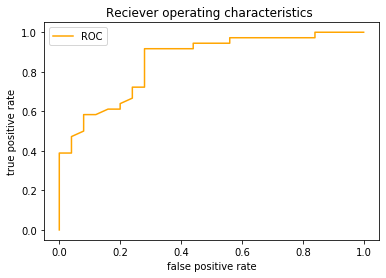

In [99]:
# draw a roc_ curve 

import matplotlib.pyplot as plt

# create a fuction 

def plot_roc_curve(fpr,tpr):
    
    """
    Plots roc curve given false postive rate(fpr) and true postive rate(tpr) 
    model
    """
    # plot roc curve
    plt.plot(fpr, tpr, color='orange', label = "ROC")
    
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("Reciever operating characteristics ")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)
    
    

In [100]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,preds_positive)

0.8538888888888889

this score shows how much area is under the curve 


### 3. Confusion matrix 

confusion matrix compares actual model with predicted model
shows the actual model on test label and shows predicted label 

In [101]:
from sklearn.metrics import confusion_matrix

preds = clf.predict(X_test)
confusion_matrix(Y_test,preds)

array([[18,  7],
       [10, 26]], dtype=int64)

In [102]:
pd.crosstab(Y_test, preds, rownames=['actual labels'], colnames = ['predicted model '])

predicted model,0,1
actual labels,,
0,18,7
1,10,26


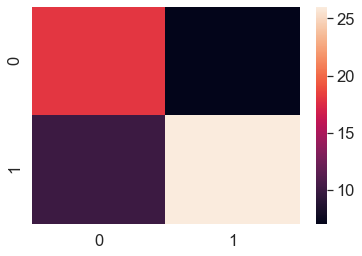

In [103]:
# make our cofusion with seaborn's heat map 

import seaborn as sns
 
# set a font scale 

sns.set(font_scale =1.5)

# create a confusion matrix 

conf_mat = confusion_matrix(Y_test,preds)

# plot usin sea born

sns.heatmap(conf_mat)

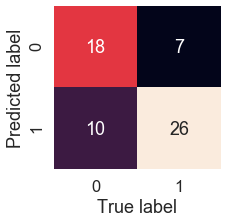

In [104]:
def confusion_mat(conf_mat):
    
    """
    Plots a confusion matrix using seaborn heat map
    """
    fig,ax = plt.subplots(figsize=(3,3))
    
    ax = sns.heatmap(conf_mat,
                     annot=True,
                     cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
confusion_mat(conf_mat)

### 4. Classification report 

In [105]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68        25
           1       0.79      0.72      0.75        36

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



## 4.2.2 Regression model evaluation metrics 

1. R^2 (pronounced as r sqaured) or coefficent of determination
2. Mean absolute error 
3. Mean sqaured error

**R^2**

what R^2 does: Compares your models predictions to the mean of the targets. Values can change from negative infinity (very poor model) to 1. for eg if all your model predicts the mean of the targets the R ^ 2 value would be 0. and if your models predicts a range of numbers R^2 sqaure value would be range of numbers.

In [106]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [107]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [108]:
# split into X features and Y labels 

X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

# choose a model 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Split into train and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)

# fit the model 

model.fit(X_train,Y_train)

# check the score 

model.score(X_test,Y_test)

0.8365666103470273

This is also called as R^2 

**2.Mean Absolute error**

mean absolute error is the average of absolute differences betweem predictions and actual value 

In [109]:
from sklearn.metrics import mean_absolute_error

# make some predictions and compare to actual result 

y_preds = model.predict(X_test)
y_preds[:10]

mean_absolute_error = mean_absolute_error(Y_test,y_preds)
mean_absolute_error

2.3236470588235285

In [110]:
df = pd.DataFrame(data={"Actual models":Y_test,"Predicted models":y_preds})
df

,Actual models,Predicted models
126,15.7,16.249
37,21.0,21.261
371,50.0,39.147
85,26.6,26.151
71,21.7,20.965
...,...,...
357,21.7,20.185
74,24.1,24.410
15,19.9,21.026
279,35.1,31.148


In [111]:
df["differences"] = df["Actual models"] - df["Predicted models"]

In [112]:
df

,Actual models,Predicted models,differences
126,15.7,16.249,-0.549
37,21.0,21.261,-0.261
371,50.0,39.147,10.853
85,26.6,26.151,0.449
71,21.7,20.965,0.735
...,...,...,...
357,21.7,20.185,1.515
74,24.1,24.410,-0.310
15,19.9,21.026,-1.126
279,35.1,31.148,3.952


**4. Mean sqaured error**

In [113]:
from sklearn.metrics import mean_squared_error

# make predictions 

y_preds = model.predict(X_test)

mean_squared_error = mean_squared_error(Y_test, y_preds)
mean_squared_error

12.107478058823524

In [114]:
df["square"] = np.square(df["differences"])

In [115]:
df

,Actual models,Predicted models,differences,square
126,15.7,16.249,-0.549,0.301401
37,21.0,21.261,-0.261,0.068121
371,50.0,39.147,10.853,117.787609
85,26.6,26.151,0.449,0.201601
71,21.7,20.965,0.735,0.540225
...,...,...,...,...
357,21.7,20.185,1.515,2.295225
74,24.1,24.410,-0.310,0.096100
15,19.9,21.026,-1.126,1.267876
279,35.1,31.148,3.952,15.618304


In [116]:
np.mean(df["square"])

12.107478058823528

## BY SCORING PARAMETERS
**1.Classification dataset**
**2.Regression data set**

**1.Classification dataset**

In [117]:
# take a heart_disease data set 
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [118]:
# split into X features and Y labels 

X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

# choose model 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# evaluate cross_val_score

from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf,X,Y,cv=5)
cross_val_score


array([0.81967213, 0.90163934, 0.80327869, 0.8       , 0.73333333])

In [119]:
print(f"The cross validated accuracy is:{np.mean(cross_val_score)*100:.2f}%")

The cross validated accuracy is:81.16%


In [120]:
from sklearn.model_selection import cross_val_score
cross_val_precision = cross_val_score(clf,X,Y,cv=5,scoring="precision")
mean_precision = np.mean(cross_val_precision)
print(f"The cross validated precision is:{mean_precision*100:.2f}%")

The cross validated precision is:82.74%


In [121]:
cross_val_recall = cross_val_score(clf,X,Y,cv=5,scoring="recall")
mean_recall = np.mean(cross_val_recall)
print(f"The cross validated recall is:{mean_recall*100:.2f}%")

The cross validated recall is:87.27%


In [122]:
cross_val_f1 = cross_val_score(clf,X,Y,cv=5,scoring="f1")
mean_f1 = np.mean(cross_val_f1)
print(f"The cross validated F1 is:{mean_f1*100:.2f}%")

The cross validated F1 is:83.62%


**2. Regression data set**


In [123]:
# take the data 

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [124]:
# split the data into X features and Y labels 

X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

# choose a model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# evaluate using cross_val_score 

from sklearn.model_selection import cross_val_score
cross_val_accuracy = cross_val_score(model,X,Y,scoring=None) #by default scoring parameter is r^2
mean_accuracy = np.mean(cross_val_accuracy)
print(f"The cross validated accuracy is:{mean_accuracy*100:.2f}%")

The cross validated accuracy is:62.38%


In [125]:
# use scoring parameter for mean_absolute error 

cross_mean_absolute_error = cross_val_score(model,X,Y,scoring = "neg_mean_absolute_error")
cross_mean_absolute_error

array([-2.10172549, -2.56714851, -3.33959406, -3.80473267, -3.19653465])

In [126]:
# using scoring parameter for mean_squared_error
cross_mean_squared_error = cross_val_score(model,X,Y,scoring="neg_mean_squared_error")
cross_mean_squared_error

array([ -8.03427361, -12.66137806, -25.0584645 , -47.27748274,
       -19.71253385])

## Using metrics as evaulation as scikit learn functions

**Classification**

In [127]:
# take a data split into X features and Y labels 

X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

# choose a model 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Split into train and test set 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# fit the model 
clf.fit(X_train,Y_train)

# predict the model 
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [128]:
# use metrics for evaluation 

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(Y_test,y_preds)
accuracy
print(f"Percentage of accuracy score:{accuracy*100:.2f}%")

Percentage of accuracy score:80.33%


In [129]:
precision = precision_score(Y_test,y_preds)
precision
print(f"Percentage of precision score:{precision*100:.2f}%")

Percentage of precision score:74.36%


In [130]:
recall = recall_score(Y_test,y_preds)
recall
print(f"Percentage of recall score:{recall*100:.2f}%")

Percentage of recall score:93.55%


In [131]:
f1 = f1_score(Y_test,y_preds)
f1
print(f"Percentage of f1 score:{f1*100:.2f}%")

Percentage of f1 score:82.86%


## 5 Improving a model

first predictions = The first predictions we make is generally a baseline prediction.
first Model = Baseline model 

**from data prespective:**
* If we collect more data we can generate more patterns and our model can improve 
* could we improve our data

**From model prespective**
* can we choose another model for better results.
* .could we improve the current model.

**Hyperparameters vs parameters**
* Parameters = Model finds pattern on data on its own.
* Hyperparameters= Settings on model you can adjust to (Potentially) improve its ability to find patterns.

In [132]:
# how to know models hyper parameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()


In [133]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**This above are all baselineparameters that our model uses and predicts our model**

### Three ways to adjust Hyperparameters

1. Tuning By Hand 
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

## 5.1 Tuning Hyperparametes by Hand

**Let's make three set training set, validation set and test set**


Tidbit: Suppose you are learning a course so first set will be the training set and after traing you will first give a practise exam ie called validation set and finally you will give your test ie test set 

**we are going to use these hyperparameters**:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [134]:
# we created these function so that we dont need to write code again and again for predicting different parameters


def evaluate_preds(y_true,y_preds):
    """
    Comparison with y_true labels and y_preds label
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    metric_dict = {"accuracy":round(accuracy,2),
                   "precision":round(precision,2),
                   "recall":round(recall,2),
                   "f1":round(recall,2)
                  }
    print(f"accuracy:{accuracy*100:.2f}%")
    print(f"precision:{precision*100:.2f}%")
    print(f"recall:{recall*100:.2f}%")
    print(f"f1:{f1*100:.2f}%")
    
    return metric_dict

In [135]:
np.random.seed(429)
# get the data 

heart_disease = pd.read_csv("13.1 heart-disease.csv")

# shuffle the data so we can get mixed train validate and test set 

heart_disease_shuffled = heart_disease.sample(frac=1)

# split the data into X features and Y labels 

X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# get the train and validate set 

train_split = round(0.7 * len(heart_disease_shuffled)) #70% data into training set
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled) ) #15% data into validation set 

# split train validate and test set 

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

# fit the model 

clf.fit(X_train,y_train)

# predict the validation set 

y_preds = clf.predict(X_valid)

# evaluate usinf evaulaute method we made above 

baseline_metrics = evaluate_preds(y_valid,y_preds)

# here baseline means we have used base parameters not hyper parameters

accuracy:77.78%
precision:80.77%
recall:80.77%
f1:80.77%


In [136]:
np.random.seed(530)
# now we will use hyperparameters named as 'n_estimators=100'

# will create a second classifier model 

clf_2 = RandomForestClassifier(n_estimators=100) # using hyperparameters
clf_2.get_params()

# fit the second model 

clf_2.fit(X_train,y_train)

# predict the model again

y_preds2 = clf_2.predict(X_valid)

# evaluate using same method 

hyperparameter_metric = evaluate_preds(y_valid,y_preds)

accuracy:77.78%
precision:80.77%
recall:80.77%
f1:80.77%


## 5.2 Tuning Hyperparameters using Randomized_searchCV

In [137]:
# choose a hyperparameter

grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}

# get the data 

heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X features and y labels 

X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# choose a model 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# split into train and test spplit 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# setup Randomized_searchCV

from sklearn.model_selection import RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

# fit the RandomizedSearchCV version of model 

rs_clf.fit(X_train,y_train)
                            

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=4, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [138]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [139]:
# predict the model with these parametres 

y_rs_preds = rs_clf.predict(X_test)

# evaluate using a function

rs_metrics = evaluate_preds(y_test, y_rs_preds)

accuracy:91.80%
precision:87.50%
recall:100.00%
f1:93.33%


## 5.3 Exhaustively by gridSearchCV

gridSearchCV is the brute force it tries every possible combination

In [141]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [143]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [164]:
# Adjust according to the best_params_

grid_2 = {"n_estimators":[10,100,200],
          "max_depth":[None,5],
          "max_features":["sqrt"],
          "max_samples_split":[2],
          "max_samples_leaf":[1]
         }

In [165]:
3*2*1*1*2*5

60

In [166]:
# get the data 

heart_disease

heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X features and y labels 

X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# split into train and test split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# get RandomgridSearch 

from sklearn.model_selection import GridSearchCV

# instantiate the gridSearchCV

gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2
                      )
# fit the model 

gs_clf.fit(X_train, y_train)

# predict the model 

y_preds = gs_clf.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_depth=None, max_features=sqrt, max_samples_leaf=1, max_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter max_samples_leaf for estimator RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [169]:
compare_metrics = pd.DataFrame({"baseline_metrics":baseline_metrics,
                   "hyperparameter_metrics":hyperparameter_metric,
                   "rs_metrics":rs_metrics})

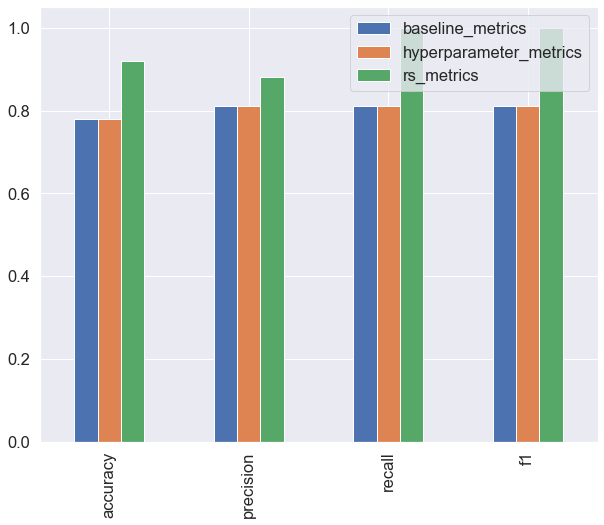

In [173]:
import matplotlib.pyplot as plt

compare_metrics.plot.bar(figsize=(10,8));

## 7. Putting altogether